In [1]:
import torch
import torchvision
from model import get_model
from config import get_cfg, get_model_args
import sys
import matplotlib.pyplot as plt

In [33]:
sys.argv=['']
cfg = get_cfg()
cfg.conditional = True
cfg.pre_trained = 'outdir/checkpoint_59'
args = get_model_args(cfg)
model = get_model(cfg, args).to(cfg.device)
model.eval();

model loadded
<All keys matched successfully>


In [34]:
@torch.no_grad()
def gen_samples(cfg, model, n_images=1):
    eps = torch.randn(n_images, cfg.latent_size).to(cfg.device)
    samples = model.decoder(eps)
    samples = torch.sigmoid(samples)
    samples = samples.detach().cpu().view(n_images, 28, 28)
    return samples

def cgen_samples(cfg, model, n_images=1):
    eps = torch.randn(n_images, cfg.latent_size).to(cfg.device)
    y = torch.randint(0, 10, size=(n_images,)).to(cfg.device)
#     y = torch.arange(0,10).to(cfg.device)
    emb = model.emb(y)
    x = torch.cat([eps, emb], dim=1)
    samples = model.decoder(x)
    samples = torch.sigmoid(samples)
    samples = samples.detach().cpu().view(n_images, 28, 28)
    return samples

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:1')


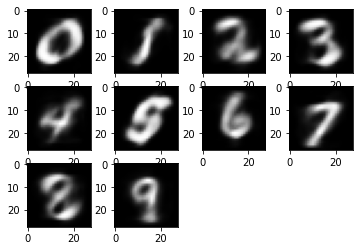

In [41]:
images = cgen_samples(cfg, model, n_images=10)
for i in range(images.shape[0]):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i], cmap='gray')